<p>Saat ini terdapat sangat banyak aplikasi mobile dengan berbagai macam kategori, ada yang gratis untuk di install dan juga ada yang berbayar. Dalam notebook ini, akan dilakukan analisis komprehensif terhadap pasar aplikasi Android dengan membandingkan lebih dari sepuluh ribu aplikasi di Play Store dalam berbagai kategori. Melalui analisis ini, akan ditemukan beberapa insight dalam data untuk menyusun strategi untuk mendorong pertumbuhan dan retensi user.</p>
<p>Dataset yang digunakan ada dua, yaitu:</p>
<ul>
<li><code>apps.csv</code>: berisi semua detail aplikasi di Play Store. Terdapat 13 columns/features yang menjelaskan aplikasi tertentu.</li>
<li><code>user_reviews.csv</code>: berisi 100 review untuk masing-masing aplikasi. Teks dalam setiap review telah diproses dan dikaitkan dengan tiga label yaitu Sentimen (Positif, Negatif, atau Netral), Polaritas Sentimen, dan Subjektivitas Sentimen.</li>
</ul>

<p>Dataset berasal dari <a href="https://www.kaggle.com/datasets/yassershrief/goggle-play-data">link berikut.</a>

In [82]:
import pandas as pd
import numpy as np

apps_with_duplicates = pd.read_csv('./datasets/apps.csv')

apps = apps_with_duplicates.drop_duplicates()

print('Jumlah aplikasi dalam dataset = ', apps.shape)
print(apps.sample(5))

Jumlah aplikasi dalam dataset =  (9659, 14)
      Unnamed: 0                                         App  Category  \
8581        9723              What's Your Story?™ ft Charmed    FAMILY   
1677        2144  Toddler Learning Games - Little Kids Games    FAMILY   
191          191                      Snag - Jobs Hiring Now  BUSINESS   
836         1047                         Endurance Lifestyle    EVENTS   
8283        9407                    Ei Electronics AudioLINK     TOOLS   

      Rating  Reviews  Size    Installs  Type Price Content Rating  \
8581     4.1    39661  47.0  1,000,000+  Free     0           Teen   
1677     4.2      731   NaN    100,000+  Free     0       Everyone   
191      4.3    32584   NaN  1,000,000+  Free     0       Everyone   
836      4.6        7   3.8        500+  Free     0           Teen   
8283     3.4       59   1.8     10,000+  Free     0       Everyone   

                     Genres      Last Updated         Current Ver  \
8581           Role P

## 1. Data Pre-processing
<p>Data Pre-processing adalah salah satu subtask yang paling penting dalam project yang berkaitan dengan data. Walaupun prosesnya cukup rumit dan membosankan, tahapan ini tidak boleh dilewati karena data yang dimiliki harus bersih dan memiliki formatting yang konsisten.</p>
<p>Dengan melihat data sampel, terlihat bahwa beberapa data dalam column <code>Installs</code> dan <code>Price</code> memiliki karakter-karakter yang berbeda seperti (<code>+</code> <code>,</code> <code>$</code>). Hal ini mencegah kolom-kolom tersebut untuk memiliki tipe data numerik , sehingga tidak ideal dan sulit untuk digunakan dalam perhitungan matematis. Idealnya, kolom-kolom ini hanya berisi angka-angka dari [0-9].</p>
<p>Maka dari itu, harus dilakukan pre-processing untuk membersihkan dan mengubah data-data yang tidak sesuai.

In [83]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


## 2. Merubah Tipe Data
<p>Setelah menghapus karakter yang tidak sesuai dengan datanya, kolom-kolom <code>Installs</code> dan <code>Price</code> memiliki tipe data <code>object</code>, namun seharusnya kolom-kolom tersebut memiliki tipe data <code>float</code>. Hal tersebut terjadi karena sebelumnya kolom-kolom tersebut memiliki data yang bercampuran antara <code>int</code> dan <code>char</code> atau <code>string</code>.

In [84]:
apps['Installs'] = apps['Installs'].astype('float64')

apps['Price'] = apps['Price'].astype('float64')

print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


## 3. Analisis Kategori-Kategori Aplikasi
<p>Dengan lebih dari 1 Billion Active Users (BAU) di 190 negara di seluruh dunia, Play Store menjadi platform yang integral untuk membangun audiens dan pasar digital secara global. Play Store memiliki peranan penting terhadap bisnis yang sedang atau akan melakukan ekspansi secara digital karena bisnis tersebut perlu untuk membuat aplikasi yang telah dibuat lebih cepat dan mudah ditemukan di Play Store.

Dalam upaya untuk meningkatkan pengalaman pencarian secara keseluruhan, Google melakukan konsep pengelompokan aplikasi ke dalam beberapa kategori.</p>
<p>Hal ini memicu pertanyaan-pertanyaan berikut:</p>
<ul>
<li>Kategori apa yang memiliki pangsa atau bagian aplikasi (aktif) tertinggi di Play Store?</li>
<li>Apakah ada kategori spesifik yang mendominasi Play Store?</li>
<li>Kategori apa yang memiliki jumlah aplikasi yang paling sedikit?</li>
</ul>

In [85]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = apps['Category'].nunique()
print('Jumlah kategori dalam Play Store = ', num_categories)

num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False) 
print(sorted_num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values,
)]

plotly.offline.iplot(data)

Jumlah kategori dalam Play Store =  33
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


## 4. Analisis Distribusi Rating Aplikasi
<p>Setelah melihat pangsa pasar untuk setiap kategori aplikasi, akan dilakukan analisis terkait rata-rata performa semua aplikasi. Rating aplikasi (dalam skala 1 sampai 5) berdampak pada discoverability, app conversion, dan brand image perusahaan secara keseluruhan. Dalam distribusi aplikasi, Rating menjadi salah satu KPI untuk menilai performa aplikasi tersebut.</p>
<p>Setelah dilakukan analisis, ditemukan bahwa rata-rata Rating di seluruh kategori aplikasi adalah <code>4.17</code>. Plot histogram miring ke kiri (left-skewed) menunjukkan bahwa sebagian besar aplikasi memiliki Rating tinggi dengan hanya beberapa pengecualian pada aplikasi dengan Rating rendah.</p>

In [86]:
avg_app_rating = np.mean(apps['Rating'])
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

layout.update({'title': 'Distribusi Aplikasi Berdasarkan Rating',
			   'xaxis': {'title': 'Rating'},
			   'yaxis': {'title': 'Jumlah Aplikasi'}})

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387994


## 5. Analisis Ukuran (Size) dan Harga (Price) Aplikasi
<p>Jika ukuran aplikasi terlalu besar, mungkin akan sulit atau mahal bagi user untuk men-download aplikasi tersebut. Waktu download yang lama dapat membuat user tidak ingin men-download atau menggunakan aplikasi yang telah dibuat. Selain itu, terdapat pertimbangan terkait storage setiap device yang digunakan user berbeda-beda dan terbatas. 

Terkait harga, secara umum user ingin aplikasi yang digunakan adalah aplikasi yang gratis.

Analisis ini memicu beberapa pertanyaan tambahan seperti:</p>

<p>Strategi efektif apa yang dapat digunakan untuk menentukan ukuran dan harga aplikasi agar meningkatkan jumlah user dan menahan retensi user?</p>

<ul>
<li>Apakah ukuran aplikasi memengaruhi rating? </li>
<li>Apakah pengguna peduli dengan aplikasi yang berat secara sistem atau mereka lebih suka aplikasi yang ringan? </li>
<li>Apakah harga aplikasi memengaruhi rating? </li>
<li>Apakah pengguna selalu lebih memilih aplikasi yang gratis daripada aplikasi yang berbayar?</li>
</ul>

<p>Hasil dari analisis ini adalah ditemukan bahwa sebagian besar aplikasi dengan rating teratas (rating di atas 4) memiliki ukuran sekitar antara 2 MB hingga 20 MB serta sebagian besar aplikasi memiliki harga di bawah $10</p>

Text(0.5, 0.98, 'Rating vs Price')

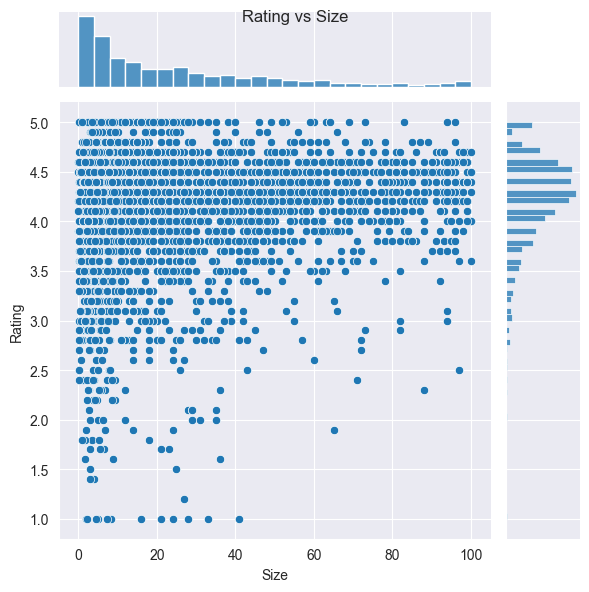

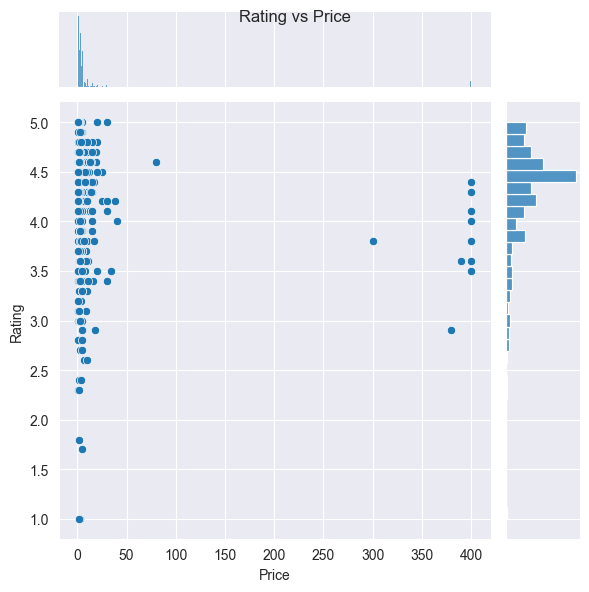

In [87]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]
# print(apps_with_size_and_rating_present)

large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)
# print(large_categories)

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
plt1.fig.suptitle('Rating vs Size')

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
plt2.fig.suptitle('Rating vs Price')

## 6. Analisis Hubungan Antara Kategori dan Aplikasi
<p>Bagaimana perusahaan dan developer aplikasi dapat memenuhi tujuan perusahaan? Strategi monetisasi apa yang dapat digunakan perusahaan untuk memaksimalkan keuntungan? Biaya pembuatan dan maintenance aplikasi sebagian besar didasarkan pada jumlah fitur, kompleksitas aplikasi, dan biaya platform.</p>

<p>Ada banyak faktor yang perlu dipertimbangkan saat memilih strategi penentuan harga yang tepat untuk aplikasi digital. Penting untuk mempertimbangkan kesediaan user untuk membayar aplikasi digital.  Calon user bisa jadi tidak tertarik dengan harga yang mereka anggap terlalu mahal atau mereka mungkin akan menghapus aplikasi yang telah mereka download setelah menerima terlalu banyak iklan dalam aplikasi gratis atau tidak mendapatkan apa yang mereka harapkan.</p>

<p>Kategori yang berbeda membutuhkan harga yang berbeda. Beberapa aplikasi yang sederhana dan digunakan setiap hari, seperti aplikasi to-do list, mungkin harus tetap gratis. Namun, akan masuk akal untuk memasang biaya untuk aplikasi medis yang cukup canggih seperti untuk mendiagnosis pasien diabetes.

Analisis ini menghasilkan bahwa aplikasi dengan kategori <em>Medical and Family</em> merupakan aplikasi yang paling mahal bahkan hingga mencapai $80.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


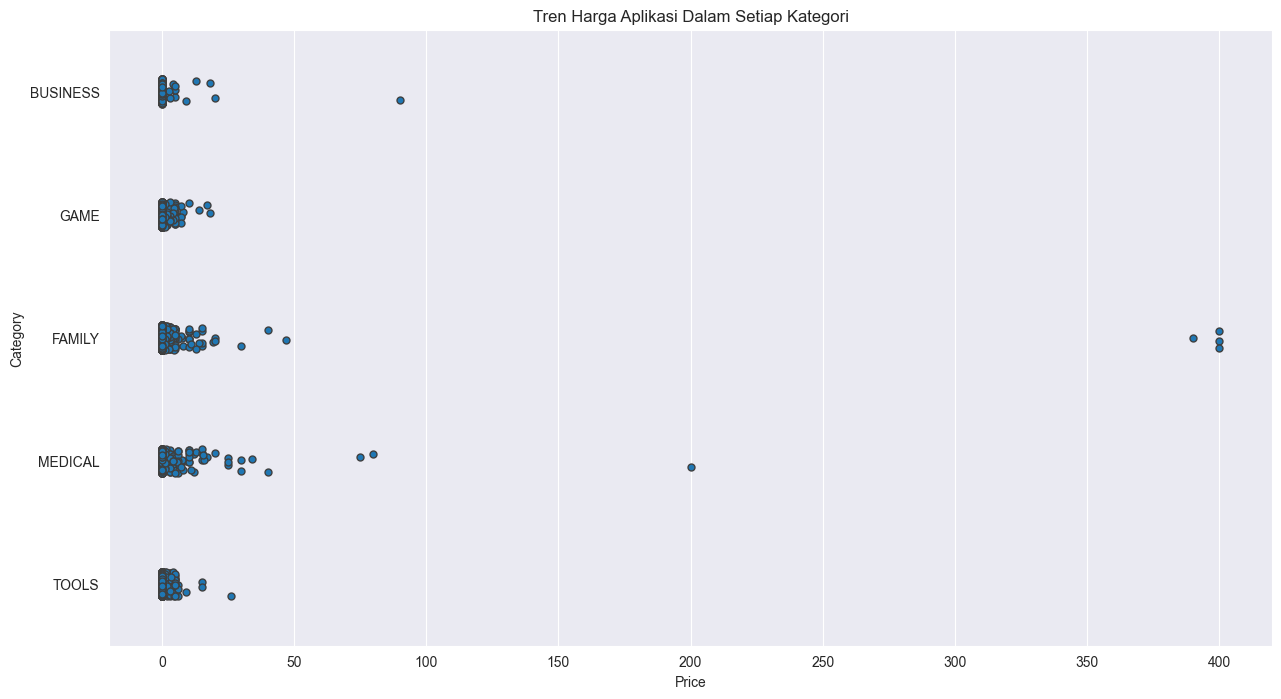

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(sorted_num_apps_in_category[:5].index)]

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('Tren Harga Aplikasi Dalam Setiap Kategori')

apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

## 7. Filter Aplikasi Outlier
<p>Dalam plot sebelumnya, terdapat outlier pada kolom-kolom <code>Family</code>. Dapat dilihat bahwa aplikasi-aplikasi dengan nama <em>I Am Rich Premium</em> atau <em>most expensive app (H)</em> ada karena mungkin untuk melakukan testing untuk mendeploy aplikasi digital ke dalam Play Store atau bisa jadi beberapa developer memasukkan virus seperti ransomware ke dalam aplikasi tersebut untuk memeras user yang men-download aplikasi tersebut.</p>

Text(0.5, 1.0, 'Treng Harga Aplikasi Dalam Setiap Kategori Setelah Filter')

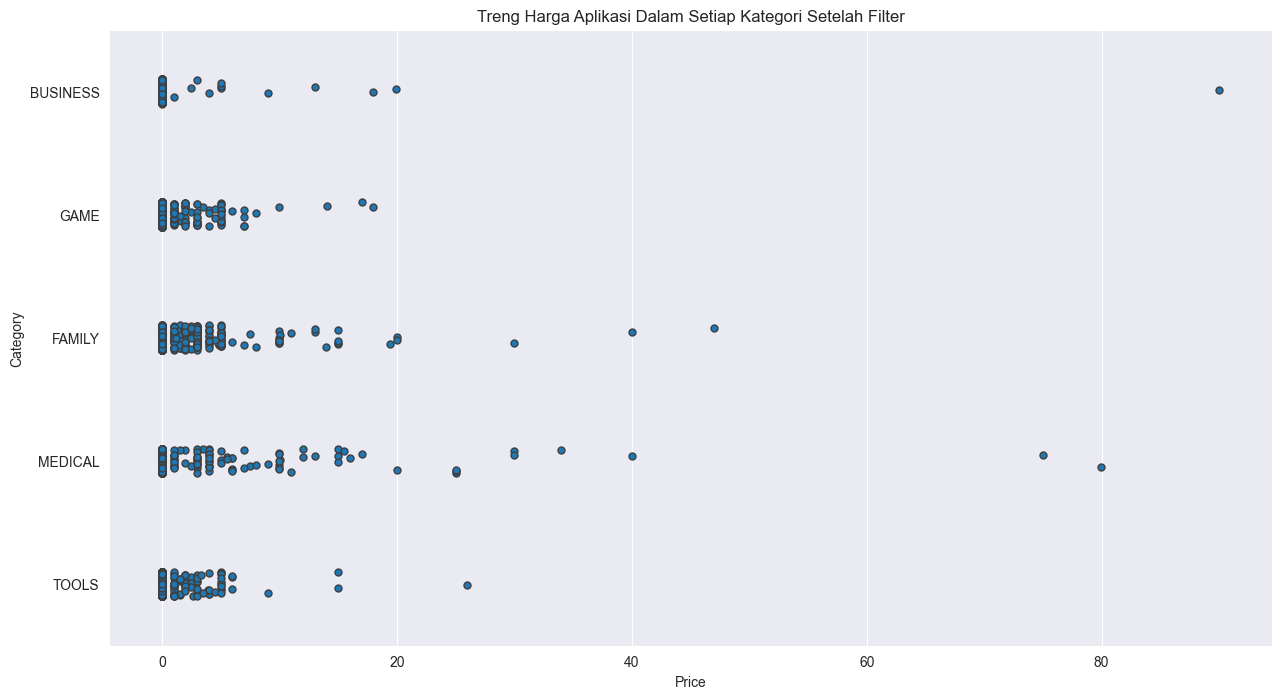

In [89]:
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('Treng Harga Aplikasi Dalam Setiap Kategori Setelah Filter')

## 8. Popularitas Aplikasi Berbayar vs Aplikasi Gratis
<p>Di Play Store saat ini, ada lima jenis strategi penetapan harga: gratis, freemium, berbayar, dan berlangganan. Fokus dalam analisis ini adalah aplikasi gratis dan berbayar. Beberapa karakteristik aplikasi gratis adalah:</p>
<ul>
<li>Gratis untuk di download.</li>
<li>Sumber pemasukan utama untuk developer aplikasi berasal dari iklan.</li>
<li>Sering dibuat oleh perusahaan yang memiliki produk lain dan aplikasi digital tersebut membantu produk tersebut.</li>
<li>Dapat berfungsi sebagai alat untuk retensi pelanggan, komunikasi, dan layanan pelanggan.</li>
</ul>
<p>Beberapa karakteristik aplikasi berbayar adalah:</p>
<ul>
<li>User diminta untuk membayar satu kali agar aplikasi dapat diunduh dan digunakan.</li>
<li>User tidak bisa benar-benar merasakan aplikasi sebelum membelinya.</li>
</ul>

<p>Apakah aplikasi berbayar diinstal sebanyak aplikasi gratis? Ternyata aplikasi berbayar memiliki jumlah penginstalan yang relatif lebih rendah daripada aplikasi gratis.</p>

In [90]:
trace0 = go.Box(
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Jumlah download Aplikasi Berbayar vs. Aplikasi Gratis",
    yaxis = dict(title = "Jumlah Download (log)",
                type = 'log',
                autorange = True)
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Analisis Sentimen Berdasarkan Review User
<p>Data ulasan pengguna dapat digunakan untuk menentukan bagaimana sentimen pengguna terhadap produk yang mereka gunakan. Ulasan pengguna untuk aplikasi dapat dianalisis untuk mengidentifikasi apakah respon mereka positif, negatif, atau netral terhadap aplikasi tersebut. Misalnya, kata-kata positif dalam ulasan aplikasi dapat mencakup kata-kata seperti 'luar biasa', 'ramah', 'bagus', 'hebat', dan 'cinta'. Kata-kata negatif mungkin berupa kata-kata seperti 'malware', 'benci', 'masalah', 'refund', dan 'tidak kompeten'.</p>

<p>Dengan memvisualisasikan skor polaritas sentimen untuk aplikasi berbayar dan gratis, dapat dilihat bahwa aplikasi gratis menerima banyak komentar kasar, seperti yang ditunjukkan oleh outlier pada sumbu y negatif. Ulasan untuk aplikasi berbayar tampaknya tidak pernah sangat negatif. Hal ini mungkin mengindikasikan sesuatu tentang kualitas aplikasi, yaitu aplikasi berbayar memiliki kualitas yang lebih tinggi daripada aplikasi gratis.</p>

In [91]:
reviews_df = pd.read_csv('./datasets/user_reviews.csv')

merged_df = apps.merge(reviews_df)

merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
merged_df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [92]:
trace0 = go.Box(
    y = merged_df[merged_df['Type'] == "Paid"]['Sentiment_Polarity'],
    name = 'Paid'
)

trace1 = go.Box(
    y = merged_df[merged_df['Type'] == "Free"]['Sentiment_Polarity'],
    name = 'Free'
)

layout = go.Layout(
    title = "Boxplot Sentimen Aplikasi Berbayar vs. Aplikasi Gratis",
    yaxis = dict(title = "Polaritas Sentimen",
                autorange = True)
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

In [93]:
import plotly.express as px

pie_sentiment = merged_df['Sentiment'].value_counts().reset_index()

pie_sentiment.columns = ['Sentiment', 'count']

fig = px.pie(pie_sentiment, values='count', names='Sentiment', title='Persentase Aplikasi Berdasarkan Sentimen')
fig.show()
